In [6]:
##############################################################################################################################
#Purpose: This script will discover what's ML model were better using confusion Matrix and f1-score
#Author: Gustavo Pires Rover
#Comments: 
#Date: 08/07/2021
##############################################################################################################################

In [66]:
######################################
# libraries
######################################
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.metrics import classification_report

In [61]:
model1_pred=pd.read_excel("Model1_Output.xlsx",index_col=[0])
model2_pred=pd.read_excel("Model2_Output.xlsx",index_col=[0])

In [11]:
model1_pred.head

<bound method NDFrame.head of      Actual_class Predicted_class  Prob
S.No                                   
1      Chimpanzee      Chimpanzee  0.66
2             Cow             Cow  0.61
3             Dog             Dog  0.56
4             Dog             Dog  0.95
5             Cat             Cat  0.91
...           ...             ...   ...
550          Lion            Lion  0.82
551           Cat             Cat  0.80
552    Chimpanzee           Panda  0.83
553           Cow             Cow  0.96
554           Cow             Cow  0.71

[554 rows x 3 columns]>

In [12]:
######################################
# Generating a confusion Matrix
# There are a 60 cats predictled correctly, but 1 dog was preidcted like a cat and 3 lions were predicted like a cat
######################################

pd.crosstab(model1_pred.Predicted_class,model1_pred.Actual_class)

Actual_class,Cat,Chimpanzee,Cow,Dog,Elephent,Lion,Panda,Spider
Predicted_class,,,,,,,,
Cat,60,0,0,1,0,3,0,0
Chimpanzee,0,31,0,0,0,0,1,0
Cow,0,0,76,0,0,0,0,0
Dog,2,0,2,63,0,0,0,0
Elephent,0,0,0,0,72,0,0,0
Lion,4,0,0,0,0,65,0,0
Panda,0,28,0,0,0,0,73,0
Spider,0,0,0,0,0,0,1,72


In [13]:
confusionM1 = pd.crosstab(model1_pred.Predicted_class,model1_pred.Actual_class)
confusionM2 = pd.crosstab(model2_pred.Predicted_class,model2_pred.Actual_class)

Text(0.5, 1.0, 'Model 2')

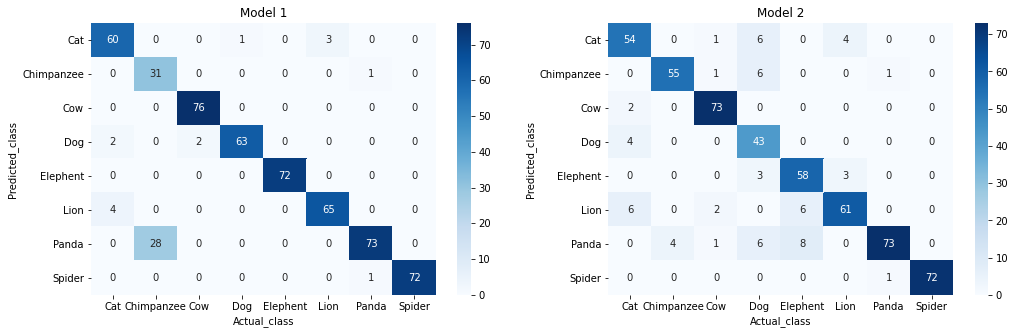

In [27]:
######################################
# Generating a figures for my confusion Matrix
######################################
'''
M1 has a confusing changind pandas with cimpanzzes
'''
fig = plt.figure(figsize=(17,5))
ax1 = plt.subplot(121)
sn.heatmap(confusionM1,annot=True,cmap='Blues')
ax1.set_title("Model 1")
'''
M2 has a lot of confusing
'''ax2 = plt.subplot(122)
sn.heatmap(confusionM2,annot=True,cmap='Blues')
ax2.set_title("Model 2")

In [36]:
######################################
# Checking the overall accurancy for the Models
######################################
print("Model 1:", np.diag(confusionM1).sum() / confusionM1.sum().sum())
print("Model 2:", np.diag(confusionM2).sum() / confusionM2.sum().sum())

Model 1: 0.924187725631769
Model 2: 0.8826714801444043


In [50]:
######################################
# F1 score
######################################
#True positive
TP = confusionM1.iloc[0,0]
#False positive
FP = confusionM1.iloc[0,:].sum() - TP
#False negative
FN = confusionM1.iloc[:,0].sum() - TP
#True negative
TN = confusionM1.sum().sum() - TP-FP-FN
Accuracy = (TP+TN)/ confusionM1.sum().sum()
Precision = TP/(TP+FP)
Recall = TP/(TP+FN)
F1score= (2 * Precision*Recall)/(Precision + Recall)

In [51]:
Accuracy

0.9819494584837545

In [52]:
print("Precision:",Precision)
print("Recall:",Recall)

Precision: 0.9375
Recall: 0.9090909090909091


In [53]:
F1score

0.923076923076923

In [57]:
######################################
# F1 score for all the elements
######################################
for i in range(confusionM1.shape[0]):
    #True positive
    TP = confusionM1.iloc[i,i]
    #False positive
    FP = confusionM1.iloc[i,:].sum() - TP
    #False negative
    FN = confusionM1.iloc[:,i].sum() - TP
    #True negative
    TN = confusionM1.sum().sum() - TP-FP-FN
    Accuracy = (TP+TN)/ confusionM1.sum().sum()
    Precision = TP/(TP+FP)
    Recall = TP/(TP+FN)
    F1score= (2 * Precision*Recall)/(Precision + Recall)
    print(confusionM1.index[i],"Accuracy:",Accuracy,"Precision",Precision,"Recall",Recall,"F1score",F1score)
print("")
print("")
for i in range(confusionM2.shape[0]):
    #True positive
    TP = confusionM2.iloc[i,i]
    #False positive
    FP = confusionM2.iloc[i,:].sum() - TP
    #False negative
    FN = confusionM2.iloc[:,i].sum() - TP
    #True negative
    TN = confusionM2.sum().sum() - TP-FP-FN
    Accuracy = (TP+TN)/ confusionM2.sum().sum()
    Precision = TP/(TP+FP)
    Recall = TP/(TP+FN)
    F1score= (2 * Precision*Recall)/(Precision + Recall)
    print(confusionM2.index[i],"Accuracy:",Accuracy,"Precision",Precision,"Recall",Recall,"F1score",F1score)
    

Cat Accuracy: 0.9819494584837545 Precision 0.9375 Recall 0.9090909090909091 F1score 0.923076923076923
Chimpanzee Accuracy: 0.9476534296028881 Precision 0.96875 Recall 0.5254237288135594 F1score 0.6813186813186813
Cow Accuracy: 0.9963898916967509 Precision 1.0 Recall 0.9743589743589743 F1score 0.9870129870129869
Dog Accuracy: 0.9909747292418772 Precision 0.9402985074626866 Recall 0.984375 F1score 0.9618320610687023
Elephent Accuracy: 1.0 Precision 1.0 Recall 1.0 F1score 1.0
Lion Accuracy: 0.9873646209386282 Precision 0.9420289855072463 Recall 0.9558823529411765 F1score 0.9489051094890512
Panda Accuracy: 0.9458483754512635 Precision 0.7227722772277227 Recall 0.9733333333333334 F1score 0.8295454545454545
Spider Accuracy: 0.9981949458483754 Precision 0.9863013698630136 Recall 1.0 F1score 0.993103448275862


Cat Accuracy: 0.9584837545126353 Precision 0.8307692307692308 Recall 0.8181818181818182 F1score 0.8244274809160306
Chimpanzee Accuracy: 0.9783393501805054 Precision 0.873015873015873 Re

In [70]:
pd.DataFrame(classification_report(model1_pred.Actual_class,model1_pred.Predicted_class,output_dict=True)).T

,precision,recall,f1-score,support
Cat,0.937500,0.909091,0.923077,66.000000
Chimpanzee,0.968750,0.525424,0.681319,59.000000
Cow,1.000000,0.974359,0.987013,78.000000
Dog,0.940299,0.984375,0.961832,64.000000
Elephent,1.000000,1.000000,1.000000,72.000000
Lion,0.942029,0.955882,0.948905,68.000000
Panda,0.722772,0.973333,0.829545,75.000000
Spider,0.986301,1.000000,0.993103,72.000000
accuracy,0.924188,0.924188,0.924188,0.924188
macro avg,0.937206,0.915308,0.915599,554.000000


In [71]:
pd.DataFrame(classification_report(model2_pred.Actual_class,model2_pred.Predicted_class,output_dict=True)).T

,precision,recall,f1-score,support
Cat,0.830769,0.818182,0.824427,66.000000
Chimpanzee,0.873016,0.932203,0.901639,59.000000
Cow,0.973333,0.935897,0.954248,78.000000
Dog,0.914894,0.671875,0.774775,64.000000
Elephent,0.906250,0.805556,0.852941,72.000000
Lion,0.813333,0.897059,0.853147,68.000000
Panda,0.793478,0.973333,0.874251,75.000000
Spider,0.986301,1.000000,0.993103,72.000000
accuracy,0.882671,0.882671,0.882671,0.882671
macro avg,0.886422,0.879263,0.878567,554.000000


In [ ]:
################################################
# M1 is better but M2 its better just for PANDA
################################################